#   Paso 1. 

## Abre el archivo y estudia información general.

In [1]:
# Cargar las librerías necesarias.

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
# Leer y corregir el archivo en caso de ser necesario.
games = pd.read_csv('/datasets/games.csv')

games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
games.info() # Verificar información general de los datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Paso 2.

## Preparación de los datos.

### Reemplaza los nombres de las columnas por minúsculas

In [4]:
# Bucle en los encabezados poniendo todo en minúsculas.
new_names_lowered = []
for old_names in games.columns:
    name_lowered = old_names.lower() #lower() pone todo el texto en minúsculas.
    new_names_lowered.append(name_lowered) #append() comando para añadir.

games.columns = new_names_lowered

games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


###  Convertir los datos a sus tipos necesarios

In [6]:
games.info() # Verificar información general de los datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
# Se procede a determinar si existen filas totalmente duplicadas.

games.duplicated().sum()

0

El siguiente paso es para cambiar los tipos de datos que se necesitan tener para no tener problemas mas adelante en el desarrollo del proyecto.

In [8]:
# Convertir 'year_of_release' a Int64 (admite valores nulos).
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors = 'coerce').astype('Int64')

# Convertir 'user_score' a float, con 'TBD' como NaN.
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

En la columna **year_of_release** se ha convertido a Int64 (un tipo de dato que admite valores nulos) porque puede haber años ausentes y originalmente estaba como flotante.

Por otra parte, en la columna **user_score** que originalmente estaba como object debido a la presencia de la abreviatura "TBD" (que significa "to be determined"), se ha convertido a float, y los valores "TBD" se han tratado como valores ausentes (NaN).

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### Si es necesario, elegir la manera de tratar valores ausentes.

Los valores ausentes en **year_of_release** y **critic_score** se deben a datos faltantes en el archivo original, y no se ha realizado ninguna imputación, ya que sería arriesgado adivinar estos valores sin más contexto.

En **user_score**, los valores "TBD" se han dejado como NaN, ya que representan puntuaciones aún por determinar.

#### Explicaciones posibles de valores faltantes.

**Puntuaciones faltantes:** Las puntuaciones de críticos o usuarios pueden no haberse recopilado en el momento o pueden estar pendientes, por otra parte, también se puede asumir que son títulos sin puntuación o con una cantidad inferior a la necesaria de reseñas para que se registre en la base de datos.

**Fechas de lanzamiento faltantes:** Algunos juegos pueden no haber sido lanzados en todas las regiones o no se dispone de datos exactos.

### Cálculo de ventas totales

In [10]:
# Cálculo de ventas totales (suma de ventas en todas las regiones).

games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


# Paso 3.

## Análisis de datos.

### Cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64 
 



<AxesSubplot:title={'center':'Cantidad de juegos lanzados por año'}, xlabel='Año de lanzamiento', ylabel='Cantidad de juegos'>

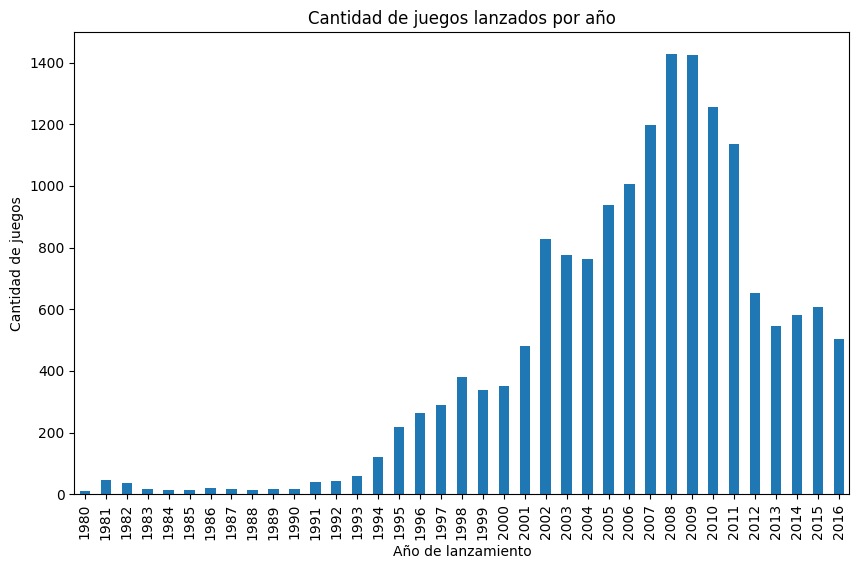

In [12]:
# Para poder sacar estos datos, primero hay que eliminar las filas con valores ausentes en year_of_release.
games_clean = games.dropna(subset = ['year_of_release'])

# Análisis de la cantidad de juegos lanzados por año.
games_per_year = games_clean.groupby('year_of_release')['name'].count()

print(games_per_year, '\n \n')

games_per_year.plot(kind = 'bar', 
                   title = 'Cantidad de juegos lanzados por año',
                   xlabel = 'Año de lanzamiento',
                   ylabel = 'Cantidad de juegos',
                   figsize = (10,6))

Se puede concluir que los datos sobre los juegos lanzados empiezan a ser significativos desde el año 1994, por lo que se puede concluir que la era de los videojuegos comenzo desde ese año, teniendo como punto máximo los años 2008 y 2009.

### Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

year_of_release  1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  \
platform                                                                      
PS2               0.0   0.0   0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0   
X360              0.0   0.0   0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0   
PS3               0.0   0.0   0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0   
Wii               0.0   0.0   0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0   
DS                0.0   0.0   0.0   0.0   0.0  0.02   0.0   0.0   0.0   0.0   
PS                0.0   0.0   0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0   
PS4               0.0   0.0   0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0   
GBA               0.0   0.0   0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0   
PSP               0.0   0.0   0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0   
3DS               0.0   0.0   0.0   0.0   0.0  0.00   0.0   0.0   0.0   0.0   

year_of_release  ...    2007    2008    2009    201

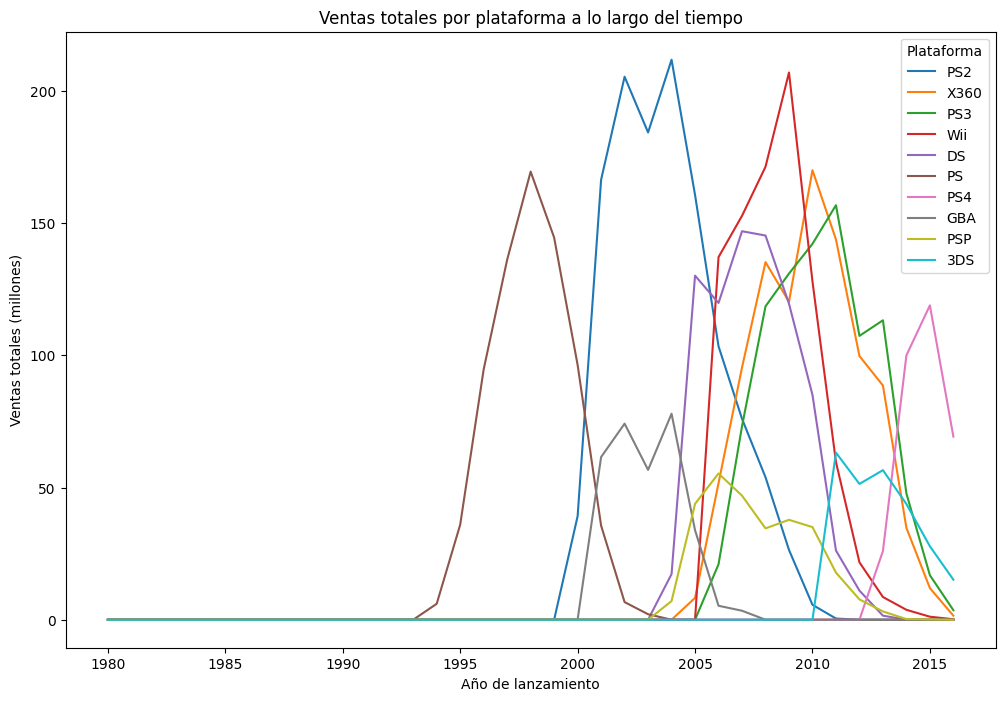

In [13]:
# Ventas por plataforma a lo largo del tiempo.
platform_sales = games_clean.groupby(['platform','year_of_release'])['total_sales'].sum().unstack().fillna(0)
top_platform = platform_sales.sum(axis = 1).sort_values(ascending = False).head(10).index
top_platform_sales = platform_sales.loc[top_platform]

print(top_platform_sales, '\n \n')

plt.figure(figsize=(12, 8))
for platform in top_platform_sales.index:
    plt.plot(top_platform_sales.columns, top_platform_sales.loc[platform], label = platform)

plt.title('Ventas totales por plataforma a lo largo del tiempo')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.legend(title='Plataforma')
plt.show()

Como se puede observar en el gráfico, las plataformas populares tienen aproximadamente un periodo de 10 años de duración, por lo que se puede afirmar que ese es el tiempo en el que las plataformas surjen, llegan a su punto maximo de ventas y despues decaen en popularidad por la aparición de plataformas nuevas.

### Determina para qué período se deben tomar datos.

Como se puede observar en el gráfico del punto anterior, se puede empezar a tomar datos aproximadamente desde el año 1994, ya que desde ese periodo se puede decir que empezó la era de los videojuegos. Sin embargo, para poder realizar proyectar un análisis hacia el futuro con respecto a la venta de videojuegos, tomando en cuenta que se quiere tomar una estrategia para el año 2017, se puede tomar como muestra los juegos que se han vendido aproximadamente desde el 2014.

### ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

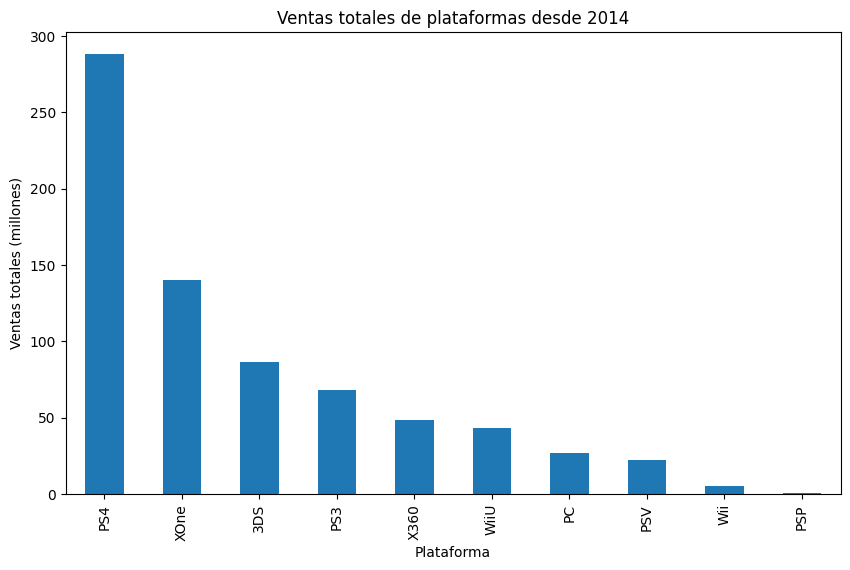

In [14]:
# Análisis de plataformas populares en crecimiento/disminución.
recent_years = games_clean[games_clean['year_of_release'] >= 2014]
platform_sales_recent = recent_years.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
platform_sales_recent.plot(kind='bar',
                          title = 'Ventas totales de plataformas desde 2014',
                          xlabel = 'Plataforma',
                          ylabel = 'Ventas totales (millones)')
plt.show()

Como se puede observar en el grafico **Ventas totales de plataformas desde 2014**, las plataformas que fueron saliendo a partir de esos años lograron tener ventas un poco mas altas de 200 millones, mientras que las plataformas que van envejeciendo presentan una disminución total en sus ventas como en el caso de Wii.

### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas?

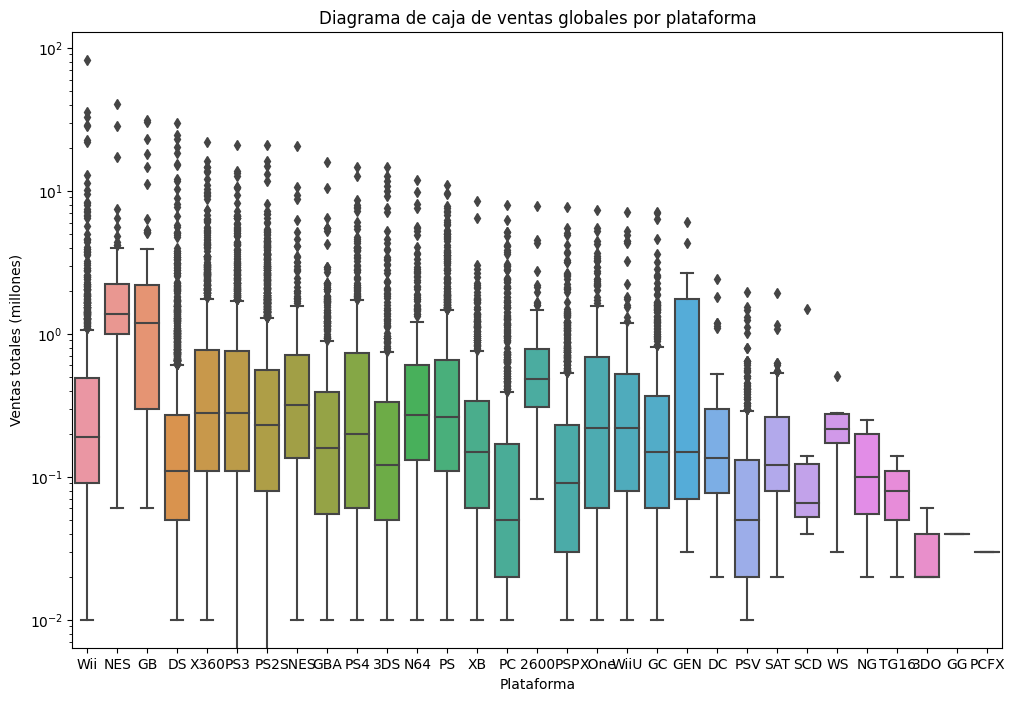

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data = games_clean)
plt.title('Diagrama de caja de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')
plt.yscale('log')  # Escala logarítmica para una mejor visualización.
plt.show()

Mediante la visualización de los diagramas de caja globales de venta por cada plataforma, se puede afirmar que existe un promedio en el que la mayoría de plataformas tienen una media cerca a un millon de ventas, sin embargo, existen varias plataformas con datos dispersos que superan este número de ventas.

### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. 

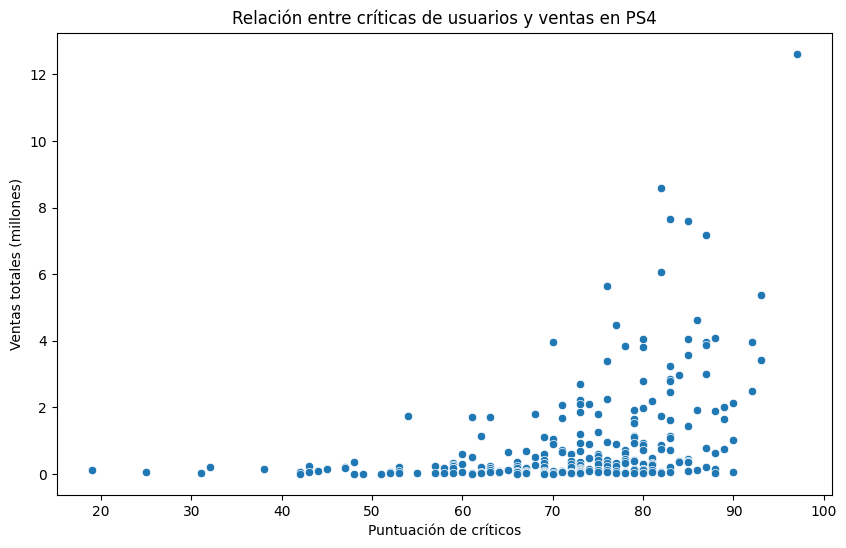

In [16]:
# Seleccionamos una plataforma popular, por ejemplo, 'PS4'.

ps4_games = games_clean[games_clean['platform'] == 'PS4']

# Gráfico de dispersión para reseñas de críticos y ventas.
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'critic_score', y = 'total_sales', data = ps4_games)
plt.title('Relación entre críticas de usuarios y ventas en PS4')
plt.xlabel('Puntuación de críticos')
plt.ylabel('Ventas totales (millones)')
plt.show()

In [17]:
# Cálculo de la correlación entre puntuaciones de críticos y ventas

# Eliminar filas con valores nulos en 'critic_score' y 'total_sales'
ps4_games_clean = ps4_games.dropna(subset = ['critic_score', 'total_sales'])

critic_correlation = ps4_games_clean['critic_score'].corr(ps4_games_clean['total_sales'])
print(f"Correlación entre la puntuación de críticos y las ventas en PS4: {critic_correlation:.2f}", "\n \n")


Correlación entre la puntuación de críticos y las ventas en PS4: 0.41 
 



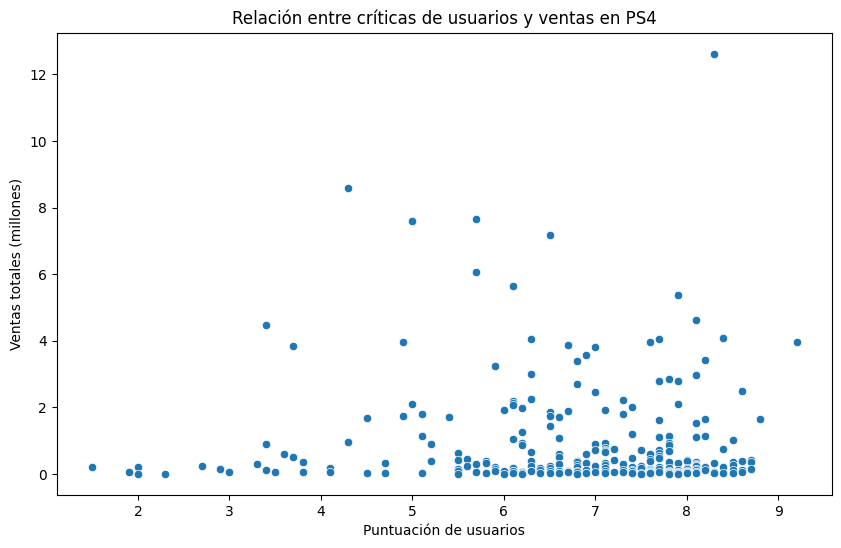

In [18]:
# Gráfico de dispersión para reseñas de usuarios y ventas

plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'user_score', y = 'total_sales', data = ps4_games)
plt.title('Relación entre críticas de usuarios y ventas en PS4')
plt.xlabel('Puntuación de usuarios')
plt.ylabel('Ventas totales (millones)')
plt.show()

In [19]:
# Cálculo de la correlación entre puntuación de usuarios y ventas

# Eliminar filas con valores nulos en 'user_score' y 'total_sales'
ps4_games_clean_user = ps4_games.dropna(subset = ['user_score', 'total_sales'])

user_correlation = ps4_games_clean_user['user_score'].corr(ps4_games_clean_user['total_sales'])
print(f"Correlación entre la puntuación de usuarios y las ventas en PS4: {user_correlation:.2f}")

Correlación entre la puntuación de usuarios y las ventas en PS4: -0.03


En base al análisis realizado, se puede llegar a la conclusión de que si tiene una relación directa una buena puntuación de juegos por parte de los críticos con el número de ventas que se realizan.

Por otra parte, la puntuación emitida por los usuarios, no determinan en la más mínima medida que un juego se venda o no.

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

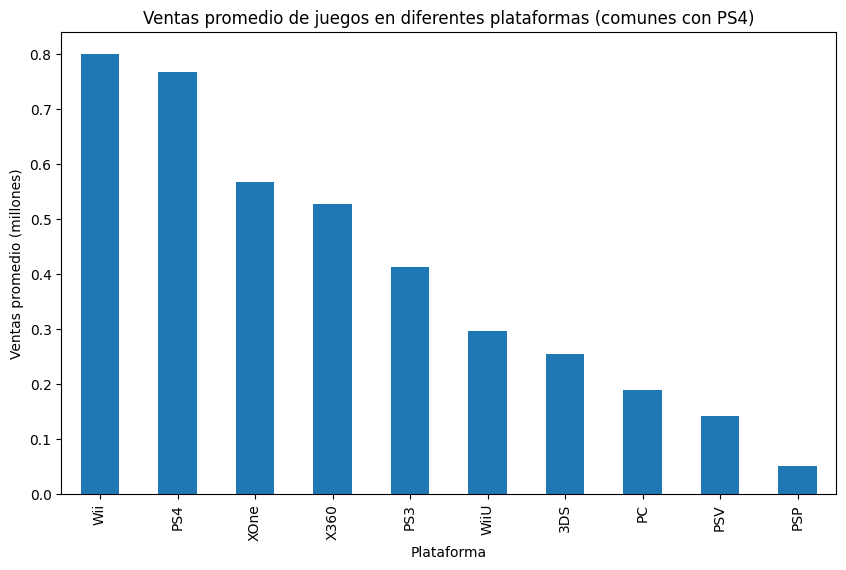

In [20]:
# Comparación de ventas de los mismos juegos en otras plataformas
same_games_diff_platforms = recent_years[recent_years['name'].isin(ps4_games['name'])]
platform_sales_comparison = same_games_diff_platforms.groupby('platform')['total_sales'].mean().sort_values(ascending = False)

plt.figure(figsize=(10, 6))
platform_sales_comparison.plot(kind = 'bar',
                              title = 'Ventas promedio de juegos en diferentes plataformas (comunes con PS4)',
                              xlabel = 'Plataforma',
                              ylabel = 'Ventas promedio (millones)')
plt.show()

En base a la comparación realizada, se puede determinar que la plataforma PS4, no es la más popular cuando se trata de juegos comunes entre consola, siendo la segunda después de Wii.

### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

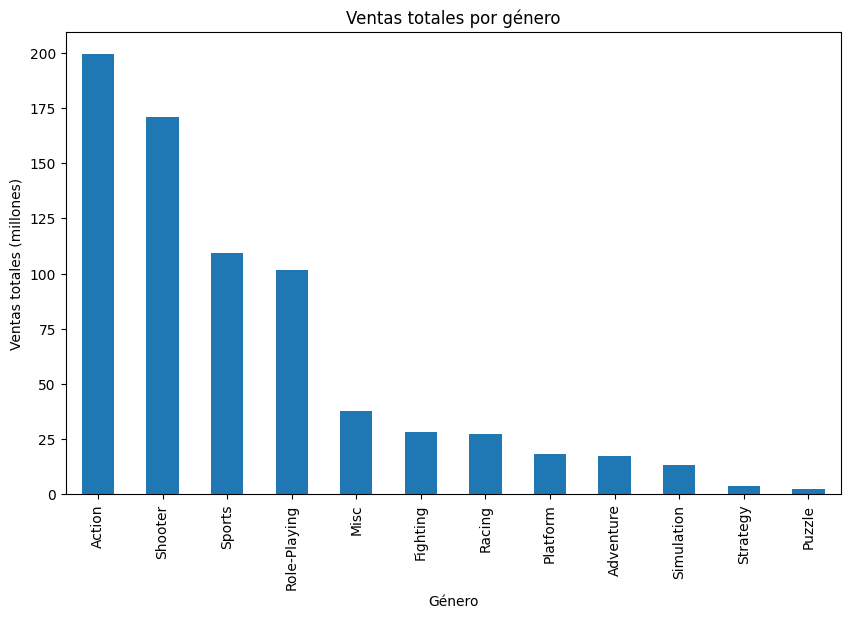

In [21]:
# Distribución de juegos por género y análisis de géneros más rentables

genre_sales = recent_years.groupby('genre')['total_sales'].sum().sort_values(ascending = False)

plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar',
                title = 'Ventas totales por género',
                xlabel = 'Género',
                ylabel = 'Ventas totales (millones)')
plt.show()


In [22]:
# Análisis de géneros más y menos rentables

print("Géneros más rentables:")
print(genre_sales.head(), '\n\n')

print("Géneros menos rentables:")
print(genre_sales.tail())

Géneros más rentables:
genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Name: total_sales, dtype: float64 


Géneros menos rentables:
genre
Platform      18.09
Adventure     17.55
Simulation    13.13
Strategy       3.96
Puzzle         2.21
Name: total_sales, dtype: float64


Según el análisis realizado, se puede decir que existe una gran diferencia entre la rentabilidad por variación de género, ya que se tiene por ejemplo, el género que mas se vende con un aproximado de 147 millones de ventas en la categoría de **Action** contra el que género menos vendido con un aproximado de 1 millones de ventas en la categoría de **puzzle**, siendo la diferencia casi por 146 millones de ventas.

# Paso 4.

## Crea un perfil de usuario para cada región.

In [23]:
recent_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### Por cada región determina las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

Top 5 plataformas en NA:
 platform
PS4     75.30
XOne    66.86
X360    24.48
PS3     16.93
WiiU    15.49
Name: na_sales, dtype: float64

Top 5 plataformas en EU:
 platform
PS4     102.35
XOne     38.13
PS3      19.69
PC       14.77
X360     13.35
Name: eu_sales, dtype: float64

Top 5 plataformas en JP:
 platform
3DS     11.00
PS4      8.77
WiiU     5.78
PSV      5.18
PS3      5.12
Name: jp_sales, dtype: float64


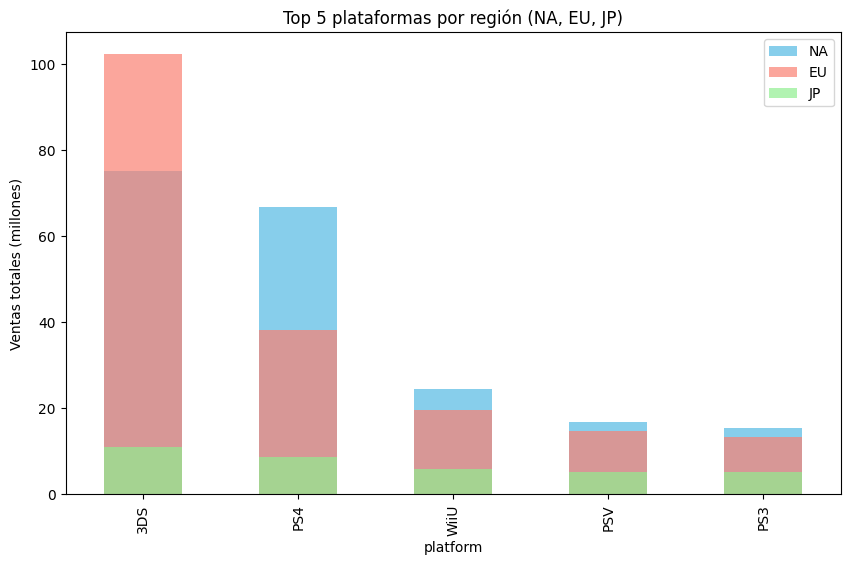

In [24]:
# Primero se debe asegurar que las columnas de ventas por cada región no tengan valores ausentes.
games[['na_sales', 'eu_sales', 'jp_sales']] = games[['na_sales', 'eu_sales', 'jp_sales']].fillna(0)

# Eliminar filas con valores nulos en 'year_of_release' y 'rating'
games_clean_recent_years = recent_years.dropna(subset=['year_of_release', 'rating'])


# Análisis de las 5 plataformas principales por cada región
def top_five_platforms_per_region(region_sales):
    top_platforms = games_clean_recent_years.groupby('platform')[region_sales].sum().sort_values(ascending = False).head(5)
    return top_platforms

na_top_platforms = top_five_platforms_per_region('na_sales')
eu_top_platforms = top_five_platforms_per_region('eu_sales')
jp_top_platforms = top_five_platforms_per_region('jp_sales')

print("Top 5 plataformas en NA:\n", na_top_platforms)
print("\nTop 5 plataformas en EU:\n", eu_top_platforms)
print("\nTop 5 plataformas en JP:\n", jp_top_platforms)

# Gráfico de las cinco plataformas principales por región
plt.figure(figsize=(10, 6))
na_top_platforms.plot(kind = 'bar',
                      color='skyblue',
                      label = 'NA',
                      title = 'Top 5 plataformas por región (NA, EU, JP)',
                      xlabel = 'Plataformas',
                      ylabel = 'Ventas totales (millones)')

eu_top_platforms.plot(kind = 'bar',
                      color='salmon',
                      label = 'EU',
                      alpha = 0.7)

jp_top_platforms.plot(kind = 'bar',
                      color='lightgreen',
                      label='JP',
                      alpha = 0.7)

plt.legend()
plt.show()

Mediante el análisis se puede ver que la plataforma más vendida es PS4 en Amércia del Norte y en Europa, mientras que la plataforma 3DS es la más vendida en Japón, siendo las plataformas PS3, WiiU y PSV igualmente comunes pero en diferente orden en cada región.

### Por cada región determina los cinco géneros principales. Explica la diferencia.

Top 5 géneros en NA:
 genre
Shooter         60.21
Action          58.79
Sports          46.03
Role-Playing    19.38
Misc             8.76
Name: na_sales, dtype: float64

Top 5 géneros en EU:
 genre
Action          61.44
Shooter         49.43
Sports          45.31
Role-Playing    18.07
Racing          11.60
Name: eu_sales, dtype: float64

Top 5 géneros en JP:
 genre
Role-Playing    11.05
Action           9.45
Shooter          4.17
Platform         2.55
Simulation       1.89
Name: jp_sales, dtype: float64


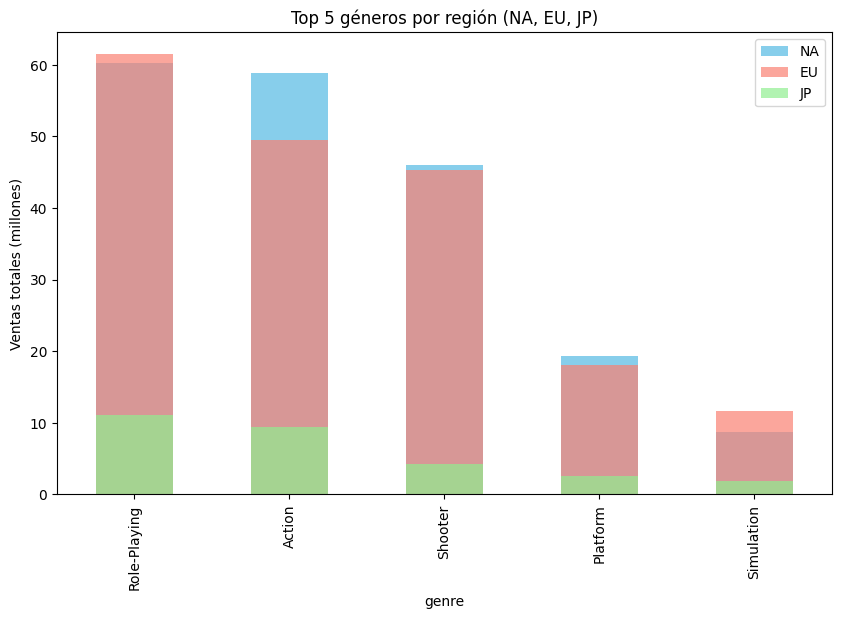

In [25]:
#Análisis de los cinco géneros principales por región
def top_five_genres_per_region(region_sales):
    top_genres = games_clean_recent_years.groupby('genre')[region_sales].sum().sort_values(ascending = False).head(5)
    return top_genres

na_top_genres = top_five_genres_per_region('na_sales')
eu_top_genres = top_five_genres_per_region('eu_sales')
jp_top_genres = top_five_genres_per_region('jp_sales')

print("Top 5 géneros en NA:\n", na_top_genres)
print("\nTop 5 géneros en EU:\n", eu_top_genres)
print("\nTop 5 géneros en JP:\n", jp_top_genres)

# Gráfico de los cinco géneros principales por región
plt.figure(figsize=(10, 6))
na_top_genres.plot(kind = 'bar',
                  color = 'skyblue',
                  label = 'NA',
                  title = 'Top 5 géneros por región (NA, EU, JP)',
                  xlabel = 'Géneros',
                  ylabel = 'Ventas totales (millones)')

eu_top_genres.plot(kind = 'bar',
                  color = 'salmon',
                  label = 'EU',
                  alpha = 0.7)

jp_top_genres.plot(kind = 'bar',
                  color = 'lightgreen',
                  label = 'JP',
                  alpha = 0.7)

plt.legend()
plt.show()

Mediante el análisis se puede ver que los juegos del genero de acción dominan las ventas en Europa y América del Norte, mientras que los juegos de rol son mas populares en Japón.

### Por cada región determina si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

Ventas por clasificación ESRB en NA:
 rating
M       96.42
E       50.74
T       38.95
E10+    33.23
Name: na_sales, dtype: float64

Ventas por clasificación ESRB en EU:
 rating
M       93.44
E       58.06
T       34.07
E10+    26.16
Name: eu_sales, dtype: float64

Ventas por clasificación ESRB en JP:
 rating
T       14.78
E        8.94
M        8.01
E10+     4.46
Name: jp_sales, dtype: float64


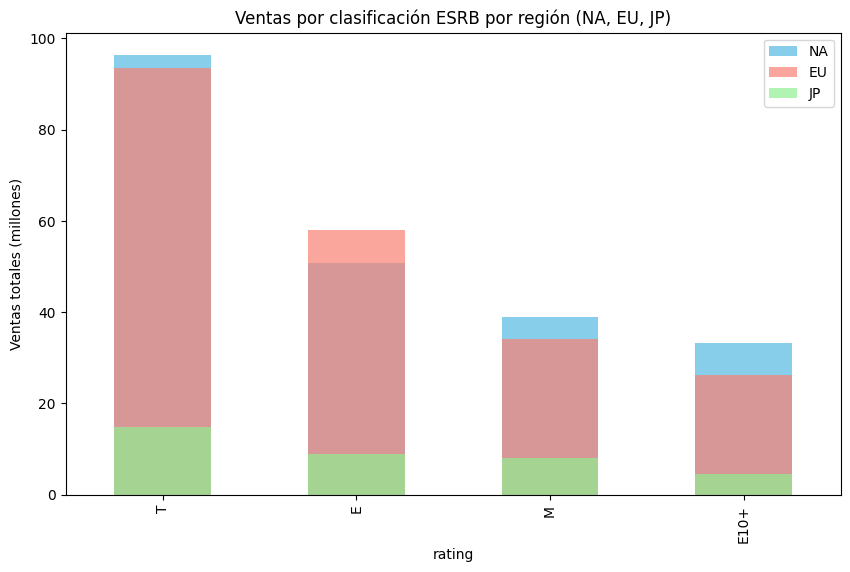

In [26]:
# Análisis del efecto de las clasificaciones ESRB en las ventas por región
def esrb_sales_by_region(region_sales):
    esrb_sales = games_clean_recent_years.groupby('rating')[region_sales].sum().sort_values(ascending = False)
    return esrb_sales

na_esrb_sales = esrb_sales_by_region('na_sales')
eu_esrb_sales = esrb_sales_by_region('eu_sales')
jp_esrb_sales = esrb_sales_by_region('jp_sales')

print("Ventas por clasificación ESRB en NA:\n", na_esrb_sales)
print("\nVentas por clasificación ESRB en EU:\n", eu_esrb_sales)
print("\nVentas por clasificación ESRB en JP:\n", jp_esrb_sales)

# Gráfico del efecto de las clasificaciones ESRB en las ventas por región
plt.figure(figsize=(10, 6))
na_esrb_sales.plot(kind = 'bar',
                  color = 'skyblue', 
                  label = 'NA',
                  title = 'Ventas por clasificación ESRB por región (NA, EU, JP)',
                  xlabel = 'Clasificación ESRB',
                  ylabel = 'Ventas totales (millones)')

eu_esrb_sales.plot(kind = 'bar',
                  color = 'salmon',
                  label = 'EU',
                  alpha = 0.7)

jp_esrb_sales.plot(kind = 'bar',
                  color = 'lightgreen',
                  label = 'JP',
                  alpha = 0.7)

plt.legend()
plt.show()

Como se puede observar dentro del análisis, los juegos con clasificación M (público maduro) son los más vendidos en Amércia del Norte y Europa, mientras que los juegos mas vendidos en Japón son los de clasificación T (adolecentes).

# Paso 5.

## Prueba de hipótesis.

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [31]:
# Filtrar las calificaciones de usuarios por plataforma.
xbox_one_scores = recent_years[recent_years['platform'] == 'XOne']['user_score'].dropna()
pc_scores = recent_years[recent_years['platform'] == 'PC']['user_score'].dropna()

# Mostrar características descriptivas acerca de ambas plataformas
print('Carácterísticas referentes a la plataforma Xbox One: \n', xbox_one_scores.describe(),
      '\n\n', 'Carácterísticas referentes a la plataforma PC: \n', pc_scores.describe())


Carácterísticas referentes a la plataforma Xbox One: 
 count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64 

 Carácterísticas referentes a la plataforma PC: 
 count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64


In [39]:
# Comprobamos homogeneidad de varianza con la prueba de Levene
levene_test = st.levene(xbox_one_scores, pc_scores)
print(f"Prueba de Levene para homogeneidad de varianzas: p-value = {levene_test.pvalue:.4f}")

if levene_test.pvalue > 0.05:
        # Prueba t de Student para muestras independientes
        t_stat, p_value = st.ttest_ind(xbox_one_scores, pc_scores)
        print(f"Prueba t de Student entre Xbox One y PC: p-value={p_value:.4f}")
else:
    # Prueba t de Welch si no hay homogeneidad de varianza
    t_stat, p_value = st.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)
    print(f"Prueba t de Welch entre Xbox One y PC: p-value = {p_value:.4f}")

Prueba de Levene para homogeneidad de varianzas: p-value = 0.0149
Prueba t de Welch entre Xbox One y PC: p-value = 0.1160


In [38]:
# Establecer el nivel de significancia comúnmente utilizado
alpha = 0.05
        
# Realizar la prueba t de dos muestras
results = st.ttest_ind(xbox_one_scores, pc_scores, equal_var = False)       
        
# Imprimir valor p resultante
print('Valor p resultante:', results.pvalue)

# Comarar el valor p con el umbral
if(results.pvalue < alpha):
    print('Rechazamos la hipótesis nula.')
else:
    print('No rechazamos la hipótesis nula.')

Valor p resultante: 0.11601398086668832
No rechazamos la hipótesis nula.


### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [29]:
# Filtrar las calificaciones de usuarios por género.
action_scores = recent_years[recent_years['genre'] == 'Action']['user_score'].dropna()
sports_scores = recent_years[recent_years['genre'] == 'Sports']['user_score'].dropna()

# Mostrar características descriptivas acerca de ambos géneros.
print(action_scores.describe(), '\n\n', sports_scores.describe())


count    1796.000000
mean        7.058129
std         1.423901
min         0.300000
25%         6.300000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64 

 count    1081.000000
mean        6.951434
std         1.619585
min         0.200000
25%         6.100000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64


In [41]:
# Comprobamos homogeneidad de varianza con la prueba de Levene
levene_test = st.levene(action_scores, sports_scores)
print(f"Prueba de Levene para homogeneidad de varianzas: p-value = {levene_test.pvalue:.4f}")
    
if levene_test.pvalue > 0.05:
    # Prueba t de Student para muestras independientes
    t_stat, p_value = st.ttest_ind(action_scores, sports_scores)
    print(f"Prueba t de Student entre Acción y Deportes: p-value = {p_value:.4f}")
else:
    # Prueba t de Welch si no hay homogeneidad de varianza
    t_stat, p_value = st.ttest_ind(action_scores, sports_scores, equal_var=False)
    print(f"Prueba t de Welch entre Acción y Deportes: p-value = {p_value:.4f}")

Prueba de Levene para homogeneidad de varianzas: p-value = 0.0001
Prueba t de Welch entre Acción y Deportes: p-value = 0.0737


In [30]:
# Establecer el nivel de significancia comúnmente utilizado
alpha = 0.05

# Realizar la prueba t de dos muestras
results = st.ttest_ind(action_scores, sports_scores, equal_var = False)

# Imprimir valor p resultante
print('Valor p resultante:', results.pvalue)

# Comarar el valor p con el umbral
if(results.pvalue < alpha):
    print('Rechazamos la hipótesis nula.')
else:
    print('No rechazamos la hipótesis nula.')

Valor p resultante: 0.07370217419278526
No rechazamos la hipótesis nula.


# Paso 6.

## Conclusión

Al realizar las pruebas de hipótesis sobre las calificaciones promedio de los usuarios en plataformas y  géneros de videojuegos, se puede extraer las siguientes conclusiones:

1. Para las calificaciones promedio en las plataformas Xbox One y PC, después de validar las varianzas mediante el método Levene, ya que se rechaza la hipótesis nula, significa que existe una diferencia significativa en las calificaciones promedio, lo que puede indicar que los usuarios tienen percepciones distintas sobre los juegos en esas plataformas.

2. Para las calificaciones promedio en los géneros de Acción y Deportes, después de validar las varianzas mediante el método Levene, ya que no se rechaza la hipótesis nula, significa que las calificaciones promedio entre ambos géneros son similares, lo que sugiere que los usuarios califican con puntuaciones parecidas sin importar su género, lo que puede ser un referente de calidad entre ambos géneros.